## Test preprep worked correctly on the ed inhouse data

In [10]:
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt
from twaidata.MRI_preprep.io import load_nii_img
import os

In [49]:
num = "CVD020"
domain = "domainD"
prep = "/home/s2208943/ipdis/data/preprocessed_data/EdData/" + domain
target = "/home/s2208943/ipdis/data/preprocessed_data/EdData/" + domain

In [50]:
#os.listdir(prep + "/imgs")

In [51]:
# example my preprocessed image (flair)
myflair = prep + f"/imgs/{num}_FLAIR.nii.gz"

# example target processed image
targetflair = target + f"/imgs/{num}_FLAIR.nii.gz"

# example my preprocessed t1
myt1 = prep + f"/imgs/{num}_T1.nii.gz"

# example my preprocessed label
mylabel = prep + f"/labels/{num}_wmh.nii.gz"

# example target preprocessed label
targetlabel = target + f"/labels/{num}_wmh.nii.gz"

In [52]:
myflair, _ = load_nii_img(myflair)

# example target processed image
targetflair, _ = load_nii_img(targetflair)

# example my preprocessed t1
myt1, _ = load_nii_img(myt1)

# example my preprocessed label
mylabel, _ = load_nii_img(mylabel)

# example target preprocessed label
targetlabel, _ = load_nii_img(targetlabel)

(-0.5, 239.5, 239.5, -0.5)

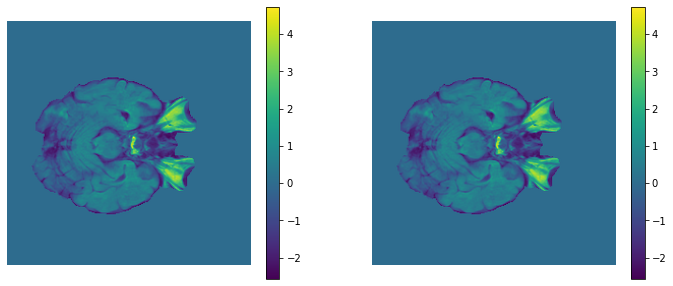

In [53]:
islice=20
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.imshow(myflair[:,:,islice])
plt.colorbar()
plt.axis(False)
plt.subplot(1,2,2)
plt.imshow(targetflair[:,:,islice])
plt.colorbar()
plt.axis(False)

In [54]:
# how close is my preprocessing to theirs
np.sum(np.abs(targetflair-myflair))

0.0

In [55]:
myflair.shape

(240, 240, 56)

In [56]:
def plotbrain(brain, islice):
    plt.imshow(brain[:,:,islice])
    plt.colorbar()
    plt.axis(False)

#### okay lets look at each step individually

In [58]:
num="CVD020"
islice=25
original, _ = load_nii_img(f"/home/s2208943/ipdis/data/core_data/mixedCVDrelease/{num}/MRI/FLAIR.nii.gz")
bet, _ = load_nii_img(prep + f"/imgs/BET_{num}_FLAIR.nii.gz")
resample, _ = load_nii_img(prep + f"/imgs/{num}_FLAIR.nii.gz")
normalize, _ = load_nii_img(prep + f"/imgs/NORMALIZE_{num}_FLAIR.nii.gz")
aim, _ = load_nii_img(target + f"/imgs/{num}_FLAIR.nii.gz")

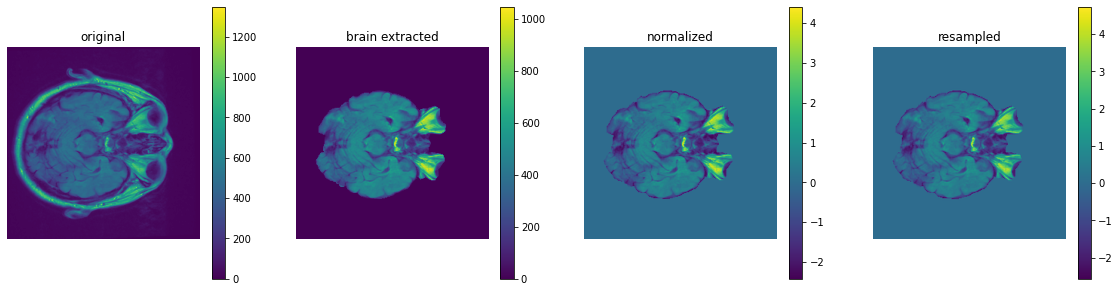

In [65]:
plt.figure(figsize=(25, 5))
plt.subplot(1,5,1)
plotbrain(original, 15)
plt.title("original")
plt.subplot(1,5,2)
plotbrain(bet, 15)
plt.title("brain extracted")
plt.subplot(1,5,3)
plotbrain(normalize, 15)
plt.title("normalized")
plt.subplot(1,5,4)
plotbrain(resample, 20)
plt.title("resampled")
#plt.subplot(1,5,5)
#plotbrain(aim, 20)
plt.show()

In [60]:
normalize.shape

(256, 256, 42)

In [61]:
resample.shape

(240, 240, 56)